In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# 直方图计算函数
def GetHist(img):
    img = img.flatten()
    img = img.tolist()
    hist = []
    for i in range(0, 256):
        hist.append(img.count(i))
    return hist

# 5. 图像增强

## 5.1 直方图均衡

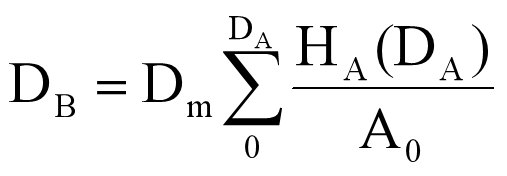

cv2函数：cv2.equalizeHist(image)

### 5.1.1 方法特点 

+ 对于具有相同内容而具有不同直方图的图像，经过直方图均衡化处理后可以得到视觉上相似的结果

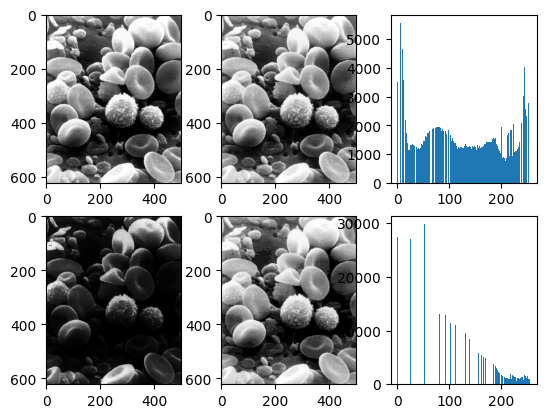

In [6]:
image1 = cv2.imread('./png_files/cell1.png', 0)
image2 = cv2.imread('./png_files/cell2.png', 0)

image1_equalized = cv2.equalizeHist(image1)
image2_equalized = cv2.equalizeHist(image2)

plt.figure()
plt.subplot(231)
plt.imshow(image1, cmap='gray')
plt.subplot(232)
plt.imshow(image1_equalized, cmap='gray')
plt.subplot(233)
plt.hist(image1_equalized.flatten(), 256, width=1.5)
plt.subplot(234)
plt.imshow(image2, cmap='gray')
plt.subplot(235)
plt.imshow(image2_equalized, cmap='gray')
plt.subplot(236)
plt.hist(image2_equalized.flatten(), 256, width=1.5)
plt.show()

注意：是 **视觉上** 相似的结果

如果不调用cv2的函数，你能一行一行地把直方图均衡算法写出来吗？

### 5.1.2 应用于人脸识别

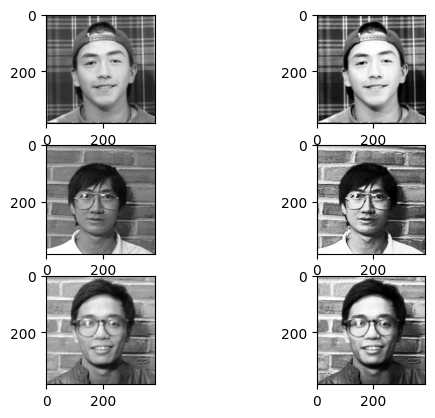

In [7]:
face1 = cv2.imread('./png_files/face1.png', 0)
face2 = cv2.imread('./png_files/face2.png', 0)
face3 = cv2.imread('./png_files/face3.png', 0)

face1_equalized = cv2.equalizeHist(face1)
face2_equalized = cv2.equalizeHist(face2)
face3_equalized = cv2.equalizeHist(face3)

plt.figure()
plt.subplot(321)
plt.imshow(face1, cmap='gray')
plt.subplot(322)
plt.imshow(face1_equalized, cmap='gray')
plt.subplot(323)
plt.imshow(face2, cmap='gray')
plt.subplot(324)
plt.imshow(face2_equalized, cmap='gray')
plt.subplot(325)
plt.imshow(face3, cmap='gray')
plt.subplot(326)
plt.imshow(face3_equalized, cmap='gray')
plt.show()

## 5.2 空间域滤波

### 5.2.1 均值滤波

方法一，滤波后的矩阵为：
 [[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10 20 30 30 30 20 10  0]
 [ 0  0 20 40 60 60 60 40 20  0]
 [ 0  0 30 60 90 90 90 60 30  0]
 [ 0  0 30 50 80 80 90 60 30  0]
 [ 0  0 30 50 80 80 90 60 30  0]
 [ 0  0 20 30 50 50 60 40 20  0]
 [ 0 10 20 30 30 30 30 20 10  0]
 [ 0 10 10 10  0  0  0  0  0  0]
 [ 0 20 20 20  0  0  0  0  0  0]]
方法二，滤波后的矩阵为：
 [[ 0  0  0  0  0  0  0  0  0  0]
 [ 0  0 10 20 30 30 30 20 10  0]
 [ 0  0 20 40 60 60 60 40 20  0]
 [ 0  0 30 60 90 90 90 60 30  0]
 [ 0  0 30 50 80 80 90 60 30  0]
 [ 0  0 30 50 80 80 90 60 30  0]
 [ 0  0 20 30 50 50 60 40 20  0]
 [ 0 10 20 30 30 30 30 20 10  0]
 [ 0 10 10 10  0  0  0  0  0  0]
 [ 0 20 20 20  0  0  0  0  0  0]]


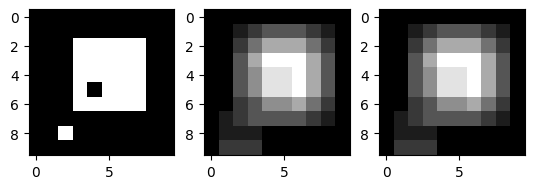

方法一和方法二的差：
 [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [14]:
# 两种方法
m = [[0, 0, 0 , 0 , 0 , 0 , 0 , 0 , 0, 0],
     [0, 0, 0 , 0 , 0 , 0 , 0 , 0 , 0, 0],
     [0, 0, 0 , 90, 90, 90, 90, 90, 0, 0],
     [0, 0, 0 , 90, 90, 90, 90, 90, 0, 0],
     [0, 0, 0 , 90, 90, 90, 90, 90, 0, 0],
     [0, 0, 0 , 90, 0 , 90, 90, 90, 0, 0],
     [0, 0, 0 , 90, 90, 90, 90, 90, 0, 0],
     [0, 0, 0 , 0 , 0 , 0 , 0 , 0 , 0, 0],
     [0, 0, 90, 0 , 0 , 0 , 0 , 0 , 0, 0],
     [0, 0, 0 , 0 , 0 , 0 , 0 , 0 , 0, 0],]

image = np.array(m, dtype=np.uint8)

# 方法一：
kernel=np.array(( [1/9, 1/9, 1/9],
                  [1/9, 1/9, 1/9],
                  [1/9, 1/9, 1/9]),dtype="float32")
image_mean_filtered1 = cv2.filter2D(image, -1, kernel)
print('方法一，滤波后的矩阵为：\n', image_mean_filtered1)

# 方法二：
image_mean_filtered2 = cv2.blur(image, (3,3))
print('方法二，滤波后的矩阵为：\n', image_mean_filtered2)

plt.figure()
plt.subplot(131)
plt.imshow(image, cmap='gray')
plt.subplot(132)
plt.imshow(image_mean_filtered1, cmap='gray')
plt.subplot(133)
plt.imshow(image_mean_filtered2, cmap='gray')
plt.show()

print('方法一和方法二的差：\n', image_mean_filtered2-image_mean_filtered1)

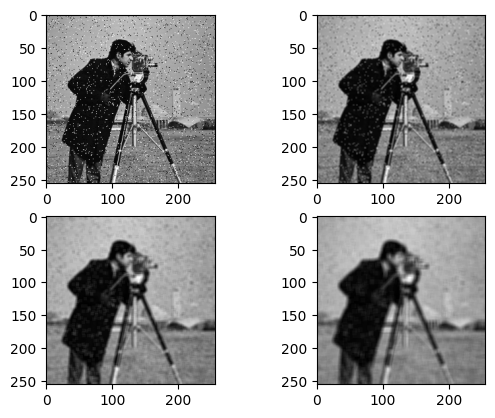

In [16]:
# 均值滤波的效果
image = cv2.imread('./png_files/salt-n-pepper.png', 0)

mean_filtered_3 = cv2.blur(image, (3,3))
mean_filtered_5 = cv2.blur(image, (5,5))
mean_filtered_7 = cv2.blur(image, (7,7))

plt.figure()
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.imshow(mean_filtered_3, cmap='gray')
plt.subplot(223)
plt.imshow(mean_filtered_5, cmap='gray')
plt.subplot(224)
plt.imshow(mean_filtered_7, cmap='gray')
plt.show()

图像的边缘和细节全都被模糊了，作用和频域下的低通滤波器一样！

### 5.2.2 高斯滤波

In [23]:
# 两种方法（在计算上有一丢丢区别）
m = [[0, 0, 0 , 0 , 0 , 0 , 0 , 0 , 0, 0],
     [0, 0, 0 , 0 , 0 , 0 , 0 , 0 , 0, 0],
     [0, 0, 0 , 90, 90, 90, 90, 90, 0, 0],
     [0, 0, 0 , 90, 90, 90, 90, 90, 0, 0],
     [0, 0, 0 , 90, 90, 90, 90, 90, 0, 0],
     [0, 0, 0 , 90, 0 , 90, 90, 90, 0, 0],
     [0, 0, 0 , 90, 90, 90, 90, 90, 0, 0],
     [0, 0, 0 , 0 , 0 , 0 , 0 , 0 , 0, 0],
     [0, 0, 90, 0 , 0 , 0 , 0 , 0 , 0, 0],
     [0, 0, 0 , 0 , 0 , 0 , 0 , 0 , 0, 0],]
image = np.array(m, dtype=np.uint8)

way1 = cv2.GaussianBlur(image, ksize=(3,3), sigmaX=0)

kernel = np.array(( [1/16, 2/16, 1/16],
                    [2/16, 4/16, 2/16],
                    [1/16, 2/16, 1/16]),dtype="float32")
way2 = cv2.filter2D(image, -1, kernel)

print(way2.astype(np.float32)-way1.astype(np.float32))

print(np.sum(way2.astype(np.float32)-way1.astype(np.float32)))

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. -1. -1. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0. -1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0. -1. -1. -1. -1.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0. -1.  0.  0.  0.  0.  0.  0.  0.]]
-15.0


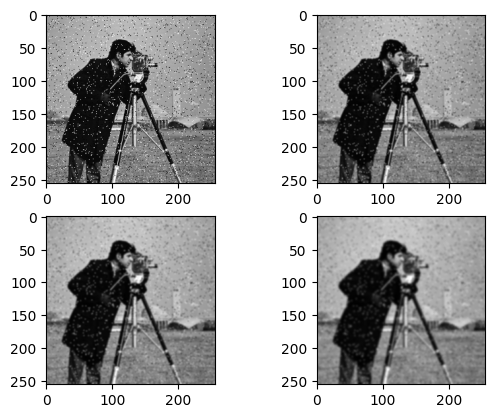

In [17]:
# 滤波效果
image = cv2.imread('./png_files/salt-n-pepper.png', 0)

gaus_filtered_3 = cv2.GaussianBlur(image, (3,3), 0)
gaus_filtered_5 = cv2.GaussianBlur(image, (5,5), 0)
gaus_filtered_7 = cv2.GaussianBlur(image, (7,7), 0)

plt.figure()
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.subplot(222)
plt.imshow(gaus_filtered_3, cmap='gray')
plt.subplot(223)
plt.imshow(gaus_filtered_5, cmap='gray')
plt.subplot(224)
plt.imshow(gaus_filtered_7, cmap='gray')
plt.show()

### 5.2.3 中值滤波

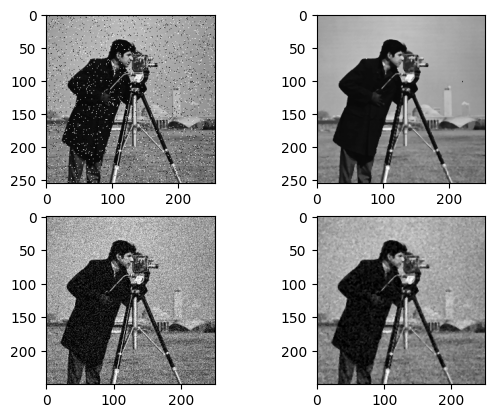

In [2]:
image_1 = cv2.imread('./png_files/salt-n-pepper.png', 0)
image_2 = cv2.imread('./png_files/gaussian.png', 0)

image_1_median = cv2.medianBlur(image_1, 3)
image_2_median = cv2.medianBlur(image_2, 3)

plt.figure()
plt.subplot(221)
plt.imshow(image_1, cmap='gray')
plt.subplot(222)
plt.imshow(image_1_median, cmap='gray')
plt.subplot(223)
plt.imshow(image_2, cmap='gray')
plt.subplot(224)
plt.imshow(image_2_median, cmap='gray')
plt.show()

对椒盐噪声最好使！

## 5.3 空间域锐化滤波器

### 5.3.1 Roberts算子（一阶差分）

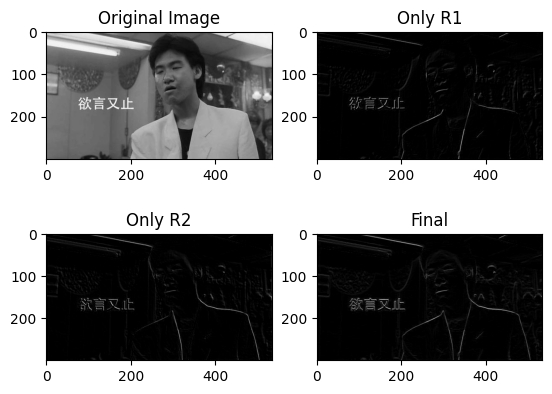

In [9]:
# 1. 读取图片
image = cv2.imread('./png_files/edge.png', 0)

# 2. 定义两个滤波器（卷积核）
r1 = np.array([[-1, 0],
               [ 0, 1]],dtype="float32")
r2 = np.array([[ 0, -1],
               [ 1,  0]],dtype="float32")

# 3. 使用定义好的两个滤波器（卷积核）分别对原始图像做滤波（卷积）操作
R1 = cv2.filter2D(image, -1, r1).astype(np.float32)
R2 = cv2.filter2D(image, -1, r2).astype(np.float32)

# 4. 将滤波后的图像取绝对值并“砍掉”过大的值（>255）
absR1 = cv2.convertScaleAbs(R1)
absR2 = cv2.convertScaleAbs(R2)

# 5.将滤波后的图像组合，成为最终的图像
R = cv2.addWeighted(absR1, 0.5, absR2, 0.5, 0)

# 6. 使用plt的方法打印出原图以及三张滤波后的图像
plt.figure()
# 6.1 打印原图
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
# 6.2 打印R1滤过的图像
plt.subplot(222)
plt.imshow(absR1, cmap='gray')
plt.title('Only R1')
# 6.3 打印R2滤过的图像
plt.subplot(223)
plt.imshow(absR2, cmap='gray')
plt.title('Only R2')
# 6.4 打印组合后的滤波图像
plt.subplot(224)
plt.imshow(R, cmap='gray')
plt.title('Final')
plt.show()

# 7. 将原图与滤波后的图像做组合，得到“边缘增强”了的新图像
conbined = image.astype(int)+R.astype(int)
conbined = cv2.convertScaleAbs(conbined)

# 8. 使用cv2的方法显示增强后的图像（要运行代码才能看到）
cv2.imshow('amplified', conbined)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 5.3.2 Prewitt算子（一阶差分）

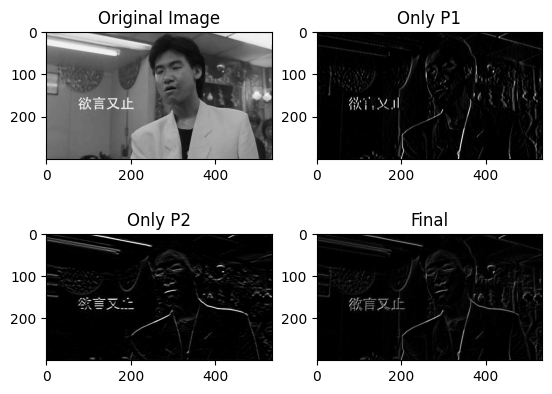

In [12]:
image = cv2.imread('./png_files/edge.png', 0)

p1 = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]],dtype="float32")

p2 = np.array([[-1, -1, -1],
               [ 0,  0,  0],
               [ 1,  1,  1]],dtype="float32")

P1 = cv2.filter2D(image, -1, p1).astype(np.float32)
P2 = cv2.filter2D(image, -1, p2).astype(np.float32)

absP1 = cv2.convertScaleAbs(P1)
absP2 = cv2.convertScaleAbs(P2)
P = cv2.addWeighted(absP1, 0.5, absP2, 0.5, 0)

plt.figure()

plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(222)
plt.imshow(absP1, cmap='gray')
plt.title('Only P1')

plt.subplot(223)
plt.imshow(absP2, cmap='gray')
plt.title('Only P2')

plt.subplot(224)
plt.imshow(P, cmap='gray')
plt.title('Final')
plt.show()


conbined = image.astype(int)+P.astype(int)
conbined = cv2.convertScaleAbs(conbined)


cv2.imshow('amplified', conbined)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 插播：Prewitt算子与Robert算子比较

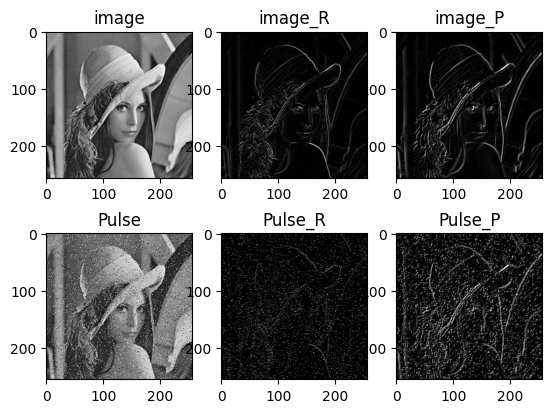

In [13]:
def EdgelizeAnImage(image,f1,f2):
    
    F1 = cv2.filter2D(image, -1, f1).astype(np.float32)
    F2 = cv2.filter2D(image, -1, f2).astype(np.float32)

    absF1 = cv2.convertScaleAbs(F1)
    absF2 = cv2.convertScaleAbs(F2)
    F = cv2.addWeighted(absF1, 0.5, absF2, 0.5, 0)
    
    return F

r1 = np.array([[-1, 0],
               [ 0, 1]],dtype="float32")
r2 = np.array([[ 0, -1],
               [ 1,  0]],dtype="float32")

p1 = np.array([[-1, 0, 1],
               [-1, 0, 1],
               [-1, 0, 1]],dtype="float32")
p2 = np.array([[-1, -1, -1],
               [ 0,  0,  0],
               [ 1,  1,  1]],dtype="float32")

image = cv2.imread('./png_files/Original.png', 0)
Pulse = cv2.imread('./png_files/Pulse_Noised_Image.png', 0)

image_R = EdgelizeAnImage(image, r1, r2)
image_P = EdgelizeAnImage(image, p1, p2)

Pulse_R = EdgelizeAnImage(Pulse, r1, r2)
Pulse_P = EdgelizeAnImage(Pulse, p1, p2)

plt.figure()
plt.subplot(231)
plt.title('image')
plt.imshow(image, cmap='gray')
plt.subplot(232)
plt.title('image_R')
plt.imshow(image_R, cmap='gray')
plt.subplot(233)
plt.title('image_P')
plt.imshow(image_P, cmap='gray')
plt.subplot(234)
plt.title('Pulse')
plt.imshow(Pulse, cmap='gray')
plt.subplot(235)
plt.title('Pulse_R')
plt.imshow(Pulse_R, cmap='gray')
plt.subplot(236)
plt.title('Pulse_P')
plt.imshow(Pulse_P, cmap='gray')
plt.show()

### 5.3.3 Sobel算子

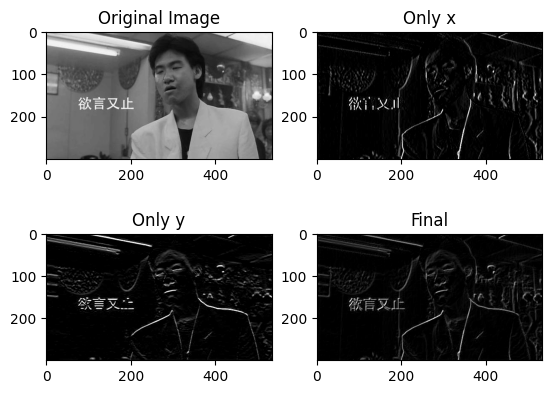

In [15]:
image = cv2.imread('./png_files/edge.png', 0)

x = cv2.Sobel(image, ddepth=-1, dx=1, dy=0)
y = cv2.Sobel(image, ddepth=-1, dx=0, dy=1)
'''ddepth: 输出图像的深度（可以理解为数据类型），-1表示与原图像相同的深度
   dx,dy:当组合为dx=1,dy=0时求x方向的一阶导数，当组合为dx=0,dy=1时求y方向的一阶导数（如果同时为1，通常得不到想要的结果）
   ksize:（可选参数）Sobel算子的大小，必须是1,3,5或者7,默认为3'''


absx = cv2.convertScaleAbs(x)
absy = cv2.convertScaleAbs(y)

F = cv2.addWeighted(absx, 0.5, absy, 0.5, 0)

plt.figure()
plt.subplot(221)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(222)
plt.imshow(absx, cmap='gray')
plt.title('Only x')
plt.subplot(223)
plt.imshow(absy, cmap='gray')
plt.title('Only y')
plt.subplot(224)
plt.imshow(F, cmap='gray')
plt.title('Final')
plt.show()


conbined = image.astype(int)+F.astype(int)
conbined = cv2.convertScaleAbs(conbined)

cv2.imshow('amplified', conbined)
cv2.waitKey(0)
cv2.destroyAllWindows()

### 5.3.4 Laplacian算子

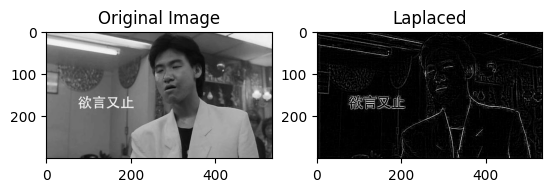

In [17]:
image = cv2.imread('./png_files/edge.png', 0)

lap = cv2.Laplacian(image, -1, ksize = 3)

abs_lap = cv2.convertScaleAbs(lap)

plt.figure()
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(122)
plt.imshow(abs_lap, cmap='gray')
plt.title('Laplaced')
plt.show()

conbined = image.astype(int)+lap.astype(int)
conbined = cv2.convertScaleAbs(conbined)

cv2.imshow('amplified', conbined)
cv2.waitKey(0)
cv2.destroyAllWindows()